In [2]:
Pkg.add("QuadGK")
using QuadGK
using Polynomials
using Plots

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [3]:
function legendre(k)
    if k == 0
        return Poly([1])
    end
    if k == 1
        return Poly([0, 1])
    else
        return legendre(k-1)*(Poly([0, 1]))*Poly([(((2*k)+1)/(k+1))])-legendre(k-2)*Poly([(k/(k+1))])
    end
end

legendre (generic function with 1 method)

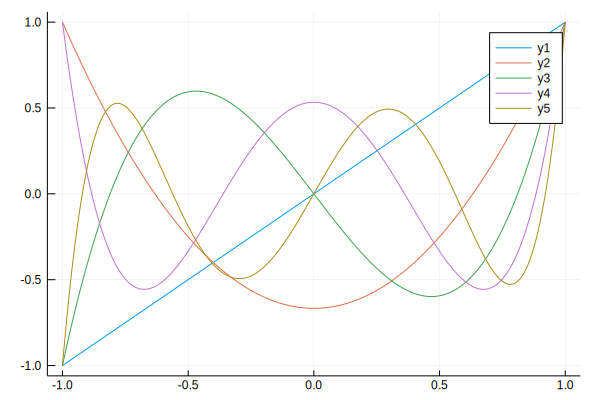

In [4]:
xs = -1:0.01:1
plot(xs, [legendre(1)(x) for x in xs])
plot!(xs, [legendre(2)(x) for x in xs])
plot!(xs, [legendre(3)(x) for x in xs])
plot!(xs, [legendre(4)(x) for x in xs])
plot!(xs, [legendre(5)(x) for x in xs])

In [38]:
roots(legendre(6))

6-element Array{Float64,1}:
 -0.9426266131059131 
 -0.6818601273055404 
  0.9426266131059144 
  0.681860127305539  
 -0.24881006900839137
  0.2488100690083914 

In [39]:
gauss(Float64, 6)

([-0.93247, -0.661209, -0.238619, 0.238619, 0.661209, 0.93247], [0.171324, 0.360762, 0.467914, 0.467914, 0.360762, 0.171324])

In [7]:
function integrate(fun, k)
    (xs, a) = gauss(Float64, k)
    integral = sum(a .* fun.(xs))
    integral
end

integrate (generic function with 1 method)

In [40]:
pol1=Poly([1,1])
pol2=Poly([1,1,1])
pol3=Poly([1,1,1,1])
pol4=Poly([1,1,1,1,1])
pol5=Poly([1,1,1,1,1,1])
pol6=Poly([1,1,1,1,1,1,1])
pol7=Poly([1,1,1,1,1,1,1,1])
pol8=Poly([1,1,1,1,1,1,1,1,1])
arr=Any[]
precision = 2
push!(arr, (1, integrate(pol1, precision), "expected 2"))
push!(arr, (2, integrate(pol2, precision), "expected 2.666666666666666"))
push!(arr, (3, integrate(pol3, precision), "expected 2.666666666666666"))
push!(arr, (4, integrate(pol4, precision), "expected 3.0666"))
push!(arr, (5, integrate(pol5, precision), "expected 3.0666"))
push!(arr, (6, integrate(pol6, precision), "expected 3.352380952380952"))
push!(arr, (7, integrate(pol7, precision), "expected 3.352380952380952"))
push!(arr, (8, integrate(pol8, precision), "expected 3.574603174603175"))
push!(arr, (integrate(pol3^4, 10), "expected 42.4990120990121"))
push!(arr, (integrate(pol3^8, 10), "expected 5411.575623223339"))

10-element Array{Any,1}:
 (1, 1.9999999999999993, "expected 2")                
 (2, 2.666666666666666, "expected 2.666666666666666") 
 (3, 2.666666666666666, "expected 2.666666666666666") 
 (4, 2.888888888888889, "expected 3.0666")            
 (5, 2.888888888888889, "expected 3.0666")            
 (6, 2.9629629629629632, "expected 3.352380952380952")
 (7, 2.962962962962963, "expected 3.352380952380952") 
 (8, 2.9876543209876543, "expected 3.574603174603175")
 (42.499012099012106, "expected 42.4990120990121")    
 (5411.574083644865, "expected 5411.575623223339")    

In [9]:
function normalize(fun, k, a, b)
    (xs, c) = gauss(Float64, k)
    remapped = [(x*(b-a)/2)+((b+a)/2) for x in xs]
    integral = sum(c .* fun.(remapped))
    integral = integral*(b-a)/2
    integral
end

normalize (generic function with 1 method)

In [42]:
normalize(pol1, 10, 1, 100) #expected 5098.5
normalize(pol2, 10, -10, 10) #expected 696.66666666

686.6666666666667

In [11]:
arr=Any[]
push!(arr, quadgk(pol1, 1, 100))
push!(arr, quadgk(pol2, -10, 10))

2-element Array{Any,1}:
 (5098.500000000001, 9.094947017729282e-13) 
 (686.6666666666665, 2.2737367544323206e-13)

In [12]:
function normgauss(x)
    1/sqrt(2*pi)*exp((-x^2)/2)
end

normgauss (generic function with 1 method)

In [13]:
quadgk(normgauss, -Inf, Inf)

(1.0000000000032583, 1.4395584941504537e-8)